# Social Network Analysis - Exercise Sheet 6a)


### Knowledge Graphs

In this task, you will work with Knowledge graphs. In particular, you will use Wikidata to generate a data set. You will then analyze the data set and provide visualizations. You are free to choose what to analyze in this task.

#### Guidelines
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 09.02.2023 23:55 MEZ
* Use the help pages from the WikiData website (https://www.wikidata.org) to learn how to retrieve data.

##### Exercise:
1. Use the Wikidata API to generate your own data set. The data set should consist of at least 30 entities.
2. Analyze the data set with either:
    - Methods you implemented in the previous exercises
    - New methods.
3. Provide visualizations for your analyses.

Make sure to add all code for the analyses as well as for creating the data set within the jupyter notebook. The data set should be created when the notebook is run.

In [109]:
import requests

def fetch_wikidata(params):
    url = 'https://www.wikidata.org/w/api.php'
    try:
        return requests.get(url, params=params)
    except:
        return 'There was and error'

In [110]:
# What text to search for
query = 'Taylor Swift'

# Which parameters to use
params = {
        'action': 'wbsearchentities',
        'format': 'json',
        'search': query,
        'language': 'en'
    }

# Fetch API
data = fetch_wikidata(params)

#show response as JSON
data = data.json()

In [111]:
# Get ID from the wbsearchentities response
id = data['search'][0]['id'] 

# Create parameters
params = {
            'action': 'wbgetentities',
            'ids':id, 
            'format': 'json',
            'languages': 'en'
        }

# fetch the API
data = fetch_wikidata(params)

# Show response
data = data.json()
data

{'entities': {'Q26876': {'pageid': 30291,
   'ns': 0,
   'title': 'Q26876',
   'lastrevid': 2078547387,
   'modified': '2024-02-16T05:36:02Z',
   'type': 'item',
   'id': 'Q26876',
   'labels': {'en': {'language': 'en', 'value': 'Taylor Swift'}},
   'descriptions': {'en': {'language': 'en',
     'value': 'American singer-songwriter (born 1989)'}},
   'aliases': {'en': [{'language': 'en', 'value': 'Taylor Alison Swift'},
     {'language': 'en', 'value': 'Nils Sjöberg'}]},
   'claims': {'P22': [{'mainsnak': {'snaktype': 'value',
       'property': 'P22',
       'hash': 'ec19069f771eff25a5a40adbd34fd0e2b4dfe094',
       'datavalue': {'value': {'entity-type': 'item',
         'numeric-id': 17319204,
         'id': 'Q17319204'},
        'type': 'wikibase-entityid'},
       'datatype': 'wikibase-item'},
      'type': 'statement',
      'id': 'Q26876$7c61140b-4c7d-edcf-bc27-5e15ad6b7cc6',
      'rank': 'normal'}],
    'P106': [{'mainsnak': {'snaktype': 'value',
       'property': 'P106',
    

In [112]:
for key in data['entities'][id]['claims']['P166'][0].keys():#['award received']
    print(key, data['entities'][id]['claims']['P166'][0][key])

mainsnak {'snaktype': 'value', 'property': 'P166', 'hash': '7b13d6c9dcde44fdd662741744149c0c120f74b3', 'datavalue': {'value': {'entity-type': 'item', 'numeric-id': 19858140, 'id': 'Q19858140'}, 'type': 'wikibase-entityid'}, 'datatype': 'wikibase-item'}
type statement
qualifiers {'P585': [{'snaktype': 'value', 'property': 'P585', 'hash': '049bd876bdfea826eaceb6f6056701b74c6d3f08', 'datavalue': {'value': {'time': '+2014-00-00T00:00:00Z', 'timezone': 0, 'before': 0, 'after': 0, 'precision': 9, 'calendarmodel': 'http://www.wikidata.org/entity/Q1985727'}, 'type': 'time'}, 'datatype': 'time'}], 'P805': [{'snaktype': 'value', 'property': 'P805', 'hash': '87b09675710c05e240cd33b0d8e5158ee1e93024', 'datavalue': {'value': {'entity-type': 'item', 'numeric-id': 17985523, 'id': 'Q17985523'}, 'type': 'wikibase-entityid'}, 'datatype': 'wikibase-item'}]}
qualifiers-order ['P585', 'P805']
id Q26876$167422d7-487a-6bf5-b8b5-60dfb84ee978
rank normal


In [113]:
import requests

def get_awards_for_person(person_name):
    # Search for the person using Wikidata
    search_url = "https://www.wikidata.org/w/api.php"
    search_params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": person_name
    }
    search_response = requests.get(search_url, params=search_params)
    search_data = search_response.json()

    # Extract the Wikidata ID of the person
    if len(search_data["search"]) == 0:
        print("Person not found")
        return
    person_id = search_data["search"][0]["id"]

    # Query for awards won by the person
    query_url = "https://query.wikidata.org/sparql"
    query = """
    SELECT ?award ?awardLabel
    WHERE {
      wd:%s p:P166 ?awardStatement.
      ?awardStatement ps:P166 ?award.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    """ % person_id
    query_params = {
        "query": query,
        "format": "json"
    }
    query_response = requests.get(query_url, params=query_params)
    query_data = query_response.json()

    # Display the awards
    print("Awards won by", person_name + ":")
    awards = []
    for item in query_data["results"]["bindings"]:
        award_label = item["awardLabel"]["value"]
        print("-", award_label)
        awards.append(award_label)

    return awards

# Replace "Taylor Swift" with any other person you want to query
get_awards_for_person("Taylor Swift")


Awards won by Taylor Swift:
- American Music Award for Favorite Country Female Artist
- American Music Award for Single of the Year
- American Music Award for Favorite Pop/Rock Female Artist
- Dick Clark Award for Excellence
- American Music Award for Favorite Country Album
- Favorite Adult Contemporary New Artist
- American Music Award for Artist of the Year
- Grammy Award for Album of the Year
- American Music Award for Favorite Country Album
- MTV Video Music Award for Best Collaboration
- MTV Video Music Award for Best Collaboration
- American Music Award for Tour of the Year
- MTV Video Music Award for Best Female Video
- Grammy Award for Best Pop Vocal Album
- American Music Award for Favorite Country Female Artist
- MTV Video Music Award for Best Visual Effects
- American Music Award for Favorite Pop/Rock Female Artist
- Grammy Award for Best Country Song
- American Music Award for Favorite Pop/Rock Album
- MTV Video Music Award for Best Female Video
- American Music Award for A

['American Music Award for Favorite Country Female Artist',
 'American Music Award for Single of the Year',
 'American Music Award for Favorite Pop/Rock Female Artist',
 'Dick Clark Award for Excellence',
 'American Music Award for Favorite Country Album',
 'Favorite Adult Contemporary New Artist',
 'American Music Award for Artist of the Year',
 'Grammy Award for Album of the Year',
 'American Music Award for Favorite Country Album',
 'MTV Video Music Award for Best Collaboration',
 'MTV Video Music Award for Best Collaboration',
 'American Music Award for Tour of the Year',
 'MTV Video Music Award for Best Female Video',
 'Grammy Award for Best Pop Vocal Album',
 'American Music Award for Favorite Country Female Artist',
 'MTV Video Music Award for Best Visual Effects',
 'American Music Award for Favorite Pop/Rock Female Artist',
 'Grammy Award for Best Country Song',
 'American Music Award for Favorite Pop/Rock Album',
 'MTV Video Music Award for Best Female Video',
 'American Music

In [114]:
import requests

def get_american_musical_artists():
    # Query for American musical artists
    query = """
    SELECT ?artist ?artistLabel
    WHERE {
      ?artist wdt:P31 wd:Q5;
              wdt:P106 wd:Q639669;
              wdt:P27 wd:Q30.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    LIMIT 10
    """

    api_url = "https://query.wikidata.org/sparql"
    headers = {
        "User-Agent": "Python script"
    }
    params = {
        "query": query,
        "format": "json"
    }
    response = requests.get(api_url, params=params, headers=headers)
    data = response.json()

    # Parse and display the results
    artists = []
    print("10 American musical artists:")
    for item in data['results']['bindings']:
        artist_label = item['artistLabel']['value']
        artists.append(artist_label)
        print(artist_label)

    return artists

# Call the function to get the American musical artists
artists = get_american_musical_artists()


10 American musical artists:
Sufjan Stevens
Russell Means
Artie Shaw
Clint Black
Wilbert Harrison
Clay Walker
Philip Farkas
Tom T. Hall
Claude King
Abie Ames


In [115]:
awards_per_artist = {}
no_award_artists = []
for artist in artists:
    awards = get_awards_for_person(artist)
    print('....', awards)
    if awards:
        print('....', awards)
        awards_per_artist[artist] = awards
    else:
        no_award_artists.append(artist)
      

Awards won by Sufjan Stevens:
- Awards Circuit community awards
- Shortlist Music Prize
- PLUG Independent Music Awards
- Gold Derby Awards
- Guild of Music Supervisors Awards
- David di Donatello
.... ['Awards Circuit community awards', 'Shortlist Music Prize', 'PLUG Independent Music Awards', 'Gold Derby Awards', 'Guild of Music Supervisors Awards', 'David di Donatello']
.... ['Awards Circuit community awards', 'Shortlist Music Prize', 'PLUG Independent Music Awards', 'Gold Derby Awards', 'Guild of Music Supervisors Awards', 'David di Donatello']
Awards won by Russell Means:
.... []
Awards won by Artie Shaw:
- Grammy Lifetime Achievement Award
- NEA Jazz Masters
- star on Hollywood Walk of Fame
.... ['Grammy Lifetime Achievement Award', 'NEA Jazz Masters', 'star on Hollywood Walk of Fame']
.... ['Grammy Lifetime Achievement Award', 'NEA Jazz Masters', 'star on Hollywood Walk of Fame']
Awards won by Clint Black:
- star on Hollywood Walk of Fame
.... ['star on Hollywood Walk of Fame']


# generate graph

In [116]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for artist in awards_per_artist.keys():
    G.add_edges_from([(artist, award[:10]) for award in awards_per_artist[artist]])
G.add_nodes_from(no_award_artists)




In [117]:
print(awards_per_artist['Bob Dylan'])

KeyError: 'Bob Dylan'

In [ ]:
for neighour in G.neighbors('Bob Dylan'):
    print(neighour)

Grammy Awa
Grammy Lif
Princess o
Nobel Priz
Polar Musi
National M
honorary d
Pulitzer P
Academy Aw
Commandeur
Rock and R
Kennedy Ce
Terence Do
Knight of 
Presidenti


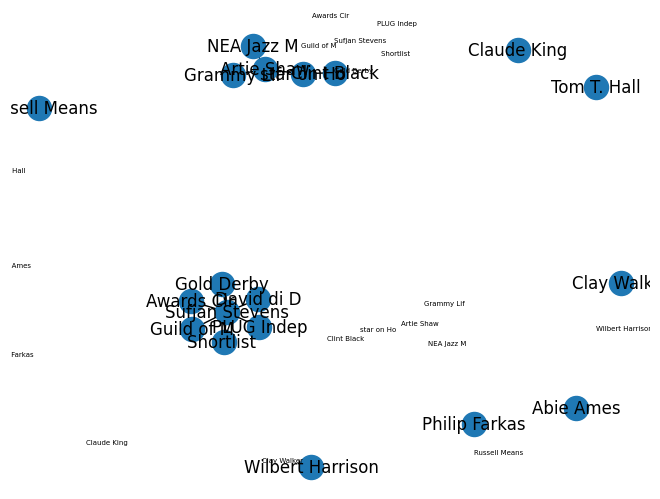

In [121]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
labels = nx.draw_networkx_labels(G, font_size=5, pos=nx.spring_layout(G))
plt.show()